In [15]:
# Se importan las librerias a usar a lo largo del proyecto

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# En esta parte se van a cargar los archivos desde kaggle

os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20241
!unzip 'udea-ai4eng-20241.zip'
!rm udea-ai4eng-20241.zip test.csv

 94% 20.0M/21.2M [00:00<00:00, 22.4MB/s]
100% 21.2M/21.2M [00:00<00:00, 25.6MB/s]
Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df = pd.read_csv('train.csv')  # Se lee el archivo csv del train

In [9]:
df.info()

# Se muestra la estructura basica del dataframe
# Incluyendo la cantidad de filas y columnas, asi como los nombres de las columnas y los tipos de datos que contiene

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [4]:
df.head() # Me da informacion de las 5 primeras filas para saber como se ven los datos

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [7]:
df.columns.to_list()  # Aqui puedo ver una lista con todas las columnas del dataframe

['ID',
 'PERIODO',
 'ESTU_PRGM_ACADEMICO',
 'ESTU_PRGM_DEPARTAMENTO',
 'ESTU_VALORMATRICULAUNIVERSIDAD',
 'ESTU_HORASSEMANATRABAJA',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_TIENEINTERNET',
 'FAMI_EDUCACIONPADRE',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEAUTOMOVIL',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_PAGOMATRICULAPROPIO',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET.1',
 'FAMI_EDUCACIONMADRE',
 'RENDIMIENTO_GLOBAL']

In [10]:
df.describe()

# Este comando calcula estadisticas descriptivas basicas
# Media, mediana, desviacion estandar, etc
# Este comando solo se aplica a las columnas que son numericas, de esta manera se conoce que solo ID y PERIODO son numericas

,ID,PERIODO
count,692500.000000,692500.000000
mean,494606.130576,20198.366679
std,285585.209455,10.535037
min,1.000000,20183.000000
25%,247324.750000,20195.000000
50%,494564.500000,20195.000000
75%,741782.500000,20203.000000
max,989286.000000,20213.000000


In [13]:
df.isnull().sum()

# De esta manera puedo conocer los valores nulos que hay en el dataframe
# Especificamente puedo ver cuantas casillas nulas hay en cada columna


ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

In [14]:
est_por_programa = df['ESTU_PRGM_ACADEMICO'].value_counts()
print(est_por_programa)

# Aqui puedo ver una informacion general de cuantos estudiantes hay por programa
# Hay que recalcar que no se visualizan todos los programas, pero si que hay 948 programas diferentes

DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: ESTU_PRGM_ACADEMICO, Length: 948, dtype: int64


In [17]:
# Se eliminan las filas que contengan valores nulos

df_sin_nulos = df.dropna()
df_sin_nulos.isnull().sum()

# Se puede observar que al hacer la suma de todas las casillas nulas por columna, esta suma retorna cero

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PRIVADO_LIBERTAD             0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_TIENEINTERNET.1              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
dtype: int64

In [18]:
# Tambien se pueden reemplazar las zonas nulas del dataframe por ceros, de tal manera que no se eliminen filas

df_zeros = df.fillna(0)
df_zeros.isnull().sum()

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_TIENELAVADORA                0
FAMI_TIENEAUTOMOVIL               0
ESTU_PRIVADO_LIBERTAD             0
ESTU_PAGOMATRICULAPROPIO          0
FAMI_TIENECOMPUTADOR              0
FAMI_TIENEINTERNET.1              0
FAMI_EDUCACIONMADRE               0
RENDIMIENTO_GLOBAL                0
dtype: int64

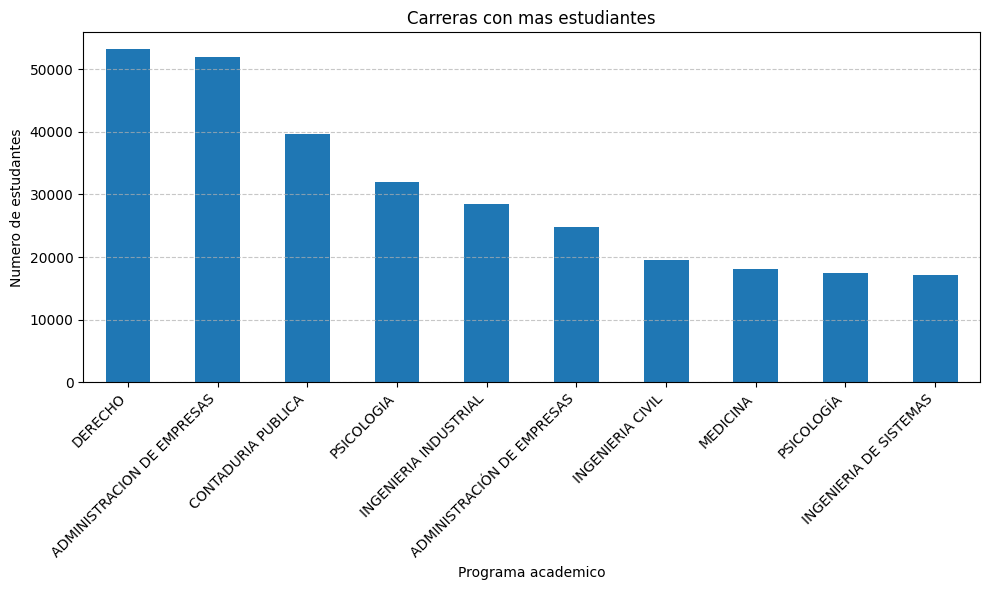

In [21]:
top_10_carreras = est_por_programa.head(10)

# Se hace un grafico donde se ven las 10 carreras con mas estudiantes y la cantidad

top_10_carreras.plot(kind='bar', figsize=(10, 6))
plt.title('Carreras con mas estudiantes')
plt.xlabel('Programa academico')
plt.ylabel('Numero de estudantes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()